In [2]:
import pandas as pd
from os.path import join

import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data_path = "../../Hackathon/Selfie-dataset/selfie_dataset.txt"#join("..", "..", "Dataset-1", "selfie_dataset.txt")
image_path = "../../Hackathon/Selfie-dataset/images/"#join("..", "..", "Dataset-1", "selfie_dataset.txt")#join("..", "..", "Dataset-1", "images")

In [4]:
headers = [
    "image_name", "score", "partial_faces" ,"is_female" ,"baby" ,"child" ,"teenager" ,"youth" ,"middle_age" ,"senior" ,"white" ,"black" ,"asian" ,"oval_face" ,"round_face" ,"heart_face" ,"smiling" ,"mouth_open" ,"frowning" ,"wearing_glasses" ,"wearing_sunglasses" ,"wearing_lipstick" ,"tongue_out" ,"duck_face" ,"black_hair" ,"blond_hair" ,"brown_hair" ,"red_hair" ,"curly_hair" ,"straight_hair" ,"braid_hair" ,"showing_cellphone" ,"using_earphone" ,"using_mirror", "braces" ,"wearing_hat" ,"harsh_lighting", "dim_lighting"
]
df_image_details = pd.read_csv(data_path, names=headers, delimiter=" ")
df_image_details.head(5)

for col in df_image_details.columns:
    print(col)

image_name
score
partial_faces
is_female
baby
child
teenager
youth
middle_age
senior
white
black
asian
oval_face
round_face
heart_face
smiling
mouth_open
frowning
wearing_glasses
wearing_sunglasses
wearing_lipstick
tongue_out
duck_face
black_hair
blond_hair
brown_hair
red_hair
curly_hair
straight_hair
braid_hair
showing_cellphone
using_earphone
using_mirror
braces
wearing_hat
harsh_lighting
dim_lighting


In [5]:
# Trial and Error Classification

poor_threshold = 4.3
average_threshold = 4.4

In [28]:
# K Means Clustering

from sklearn.cluster import KMeans
import numpy as np

scores = np.array(df_image_details.iloc[:, 1])

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(scores.reshape(-1, 1))

clusters = {}

for label in kmeans.labels_:
    clusters[label] = clusters.get(label, 0) + 1
    
print("Great Cluster Center: ", kmeans.cluster_centers_[2])
print("Average Cluster Center: ", kmeans.cluster_centers_[0])
print("Poor Cluster Center: ", kmeans.cluster_centers_[1])

Great Cluster Center:  [5.07968678]
Average Cluster Center:  [4.35668987]
Poor Cluster Center:  [3.61432493]


In [24]:
import pickle
pickle.dump(file=open('km.dat', 'wb'), obj={'clf':kmeans})

In [7]:
# df_poor_selfies = df_image_details[df_image_details.score <= poor_threshold]
# df_average_selfies = df_image_details[(df_image_details.score > poor_threshold)]
# df_average_selfies = df_image_details[(df_image_details.score <= average_threshold)]
# df_great_selfies = df_image_details[df_image_details.score > average_threshold]

In [8]:
# df_poor_selfies.score.values[:] = df_poor_selfies.score.astype(int)
# df_poor_selfies['score'].values[:] = 0

# df_average_selfies.score.values[:] = df_average_selfies.score.astype(int)
# df_average_selfies['score'].values[:] = 1

# df_great_selfies.score.values[:] = df_great_selfies.score.astype(int)
# df_great_selfies['score'].values[:] = 2

In [10]:
# print("Number of Poor Selfies:", len(df_poor_selfies))
# print("Number of Average Selfies:", len(df_average_selfies))
# print("Number of Great Selfies:", len(df_great_selfies))

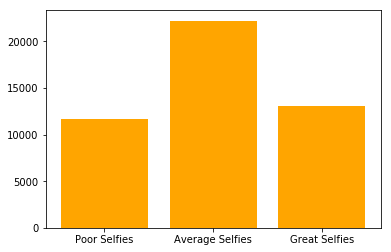

In [26]:
rating_distribution = [c[1], c[0], c[2]]
plt.bar(['Poor Selfies', 'Average Selfies', 'Great Selfies'], height=rating_distribution, color="orange")
# plt.xticks(rotation=60)
plt.show()

In [13]:
# df_classification = pd.DataFrame()
# df_classification = df_classification.append(df_poor_selfies)
# df_classification = df_classification.append(df_average_selfies)
# df_classification = df_classification.append(df_great_selfies)

df_classification = df_image_details

In [14]:
df_classification.head()

classes_dataframe = pd.DataFrame({'class': classes})
df_classification = df_classification.join(classes_dataframe)

In [15]:
df_classification.replace(to_replace=-1, value=0, inplace=True)
df_classification.head(3)

,image_name,score,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,...,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting,class
0,00a454da495e11e28a7322000a1fa414_6,3.901,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,00cddb96ac4c11e3a30212279ba1b65f_6,4.385,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,01cdd7aa1a1a11e2aaa822000a1fb0dd_6,4.243,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [34]:
from keras.models import Sequential
from keras.layers import Dense, ReLU, Softmax
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
import numpy as np

Using TensorFlow backend.


In [35]:
df_classification = df_classification.sample(frac=1)

In [36]:
X = df_classification[headers[2:]].values
Y = df_classification['class'].values

In [37]:
X.shape, Y.shape

((46836, 36), (46836,))

In [38]:
Y = to_categorical(Y)

In [39]:
test_size = 3000
X_train, Y_train = X[:-3000], Y[:-3000]
X_test, Y_test = X[-3000:], Y[-3000:]
X_train.shape, Y_train.shape,X_test.shape,  Y_test.shape

((43836, 36), (43836, 3), (3000, 36), (3000, 3))

In [40]:
model = Sequential()

model.add(Dense(36, input_shape=(36, )))
model.add(ReLU())

# model.add(Dense(256))
# model.add(ReLU())

# model.add(Dense(128))
# model.add(ReLU())

model.add(Dense(3))
model.add(Softmax())

In [41]:
model.compile(optimizer=SGD(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 36)                1332      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 36)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 111       
_________________________________________________________________
softmax_1 (Softmax)          (None, 3)                 0         
Total params: 1,443
Trainable params: 1,443
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X_train, Y_train,
         validation_split=0.2,
         batch_size=2048,
         epochs=1000)

Train on 35068 samples, validate on 8768 samples
Epoch 1/1000
35068/35068 [==============================] - 0s 6us/step - loss: 1.0697 - acc: 0.4586 - val_loss: 1.0718 - val_acc: 0.4562
Epoch 2/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0696 - acc: 0.4587 - val_loss: 1.0717 - val_acc: 0.4563
Epoch 3/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0695 - acc: 0.4590 - val_loss: 1.0716 - val_acc: 0.4562
Epoch 4/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0694 - acc: 0.4592 - val_loss: 1.0715 - val_acc: 0.4562
Epoch 5/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0694 - acc: 0.4593 - val_loss: 1.0714 - val_acc: 0.4556
Epoch 6/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0693 - acc: 0.4602 - val_loss: 1.0714 - val_acc: 0.4547
Epoch 7/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0692 - acc: 0.4604 - val_loss: 1.0713 - v

Epoch 118/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0643 - acc: 0.4695 - val_loss: 1.0660 - val_acc: 0.4672
Epoch 119/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0643 - acc: 0.4695 - val_loss: 1.0660 - val_acc: 0.4672
Epoch 120/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0642 - acc: 0.4695 - val_loss: 1.0660 - val_acc: 0.4673
Epoch 121/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0642 - acc: 0.4695 - val_loss: 1.0659 - val_acc: 0.4673
Epoch 122/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0642 - acc: 0.4695 - val_loss: 1.0659 - val_acc: 0.4673
Epoch 123/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0641 - acc: 0.4695 - val_loss: 1.0659 - val_acc: 0.4673
Epoch 124/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0641 - acc: 0.4695 - val_loss: 1.0659 - val_acc: 0.4673
Epoch 125/1000
35068

35068/35068 [==============================] - 0s 5us/step - loss: 1.0613 - acc: 0.4714 - val_loss: 1.0630 - val_acc: 0.4677
Epoch 235/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0613 - acc: 0.4714 - val_loss: 1.0629 - val_acc: 0.4677
Epoch 236/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0613 - acc: 0.4714 - val_loss: 1.0629 - val_acc: 0.4677
Epoch 237/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0612 - acc: 0.4714 - val_loss: 1.0629 - val_acc: 0.4677
Epoch 238/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0612 - acc: 0.4714 - val_loss: 1.0629 - val_acc: 0.4677
Epoch 239/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0612 - acc: 0.4715 - val_loss: 1.0629 - val_acc: 0.4678
Epoch 240/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0612 - acc: 0.4715 - val_loss: 1.0628 - val_acc: 0.4678
Epoch 241/1000
35068/35068 [=======

35068/35068 [==============================] - 0s 5us/step - loss: 1.0591 - acc: 0.4723 - val_loss: 1.0607 - val_acc: 0.4694
Epoch 351/1000
35068/35068 [==============================] - 0s 6us/step - loss: 1.0591 - acc: 0.4723 - val_loss: 1.0606 - val_acc: 0.4694
Epoch 352/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0590 - acc: 0.4723 - val_loss: 1.0606 - val_acc: 0.4694
Epoch 353/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0590 - acc: 0.4723 - val_loss: 1.0606 - val_acc: 0.4697
Epoch 354/1000
35068/35068 [==============================] - 0s 6us/step - loss: 1.0590 - acc: 0.4723 - val_loss: 1.0606 - val_acc: 0.4697
Epoch 355/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0590 - acc: 0.4723 - val_loss: 1.0606 - val_acc: 0.4697
Epoch 356/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0590 - acc: 0.4723 - val_loss: 1.0605 - val_acc: 0.4697
Epoch 357/1000
35068/35068 [=======

35068/35068 [==============================] - 0s 5us/step - loss: 1.0572 - acc: 0.4727 - val_loss: 1.0588 - val_acc: 0.4701
Epoch 467/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0572 - acc: 0.4726 - val_loss: 1.0588 - val_acc: 0.4701
Epoch 468/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0572 - acc: 0.4726 - val_loss: 1.0588 - val_acc: 0.4701
Epoch 469/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0572 - acc: 0.4726 - val_loss: 1.0587 - val_acc: 0.4701
Epoch 470/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0572 - acc: 0.4726 - val_loss: 1.0587 - val_acc: 0.4701
Epoch 471/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0572 - acc: 0.4727 - val_loss: 1.0587 - val_acc: 0.4700
Epoch 472/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0572 - acc: 0.4727 - val_loss: 1.0587 - val_acc: 0.4700
Epoch 473/1000
35068/35068 [=======

35068/35068 [==============================] - 0s 5us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 583/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 584/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 585/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 586/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 587/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 588/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0557 - acc: 0.4730 - val_loss: 1.0572 - val_acc: 0.4705
Epoch 589/1000
35068/35068 [=======

35068/35068 [==============================] - 0s 5us/step - loss: 1.0545 - acc: 0.4732 - val_loss: 1.0559 - val_acc: 0.4705
Epoch 699/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0545 - acc: 0.4731 - val_loss: 1.0559 - val_acc: 0.4705
Epoch 700/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0544 - acc: 0.4731 - val_loss: 1.0559 - val_acc: 0.4705
Epoch 701/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0544 - acc: 0.4731 - val_loss: 1.0559 - val_acc: 0.4705
Epoch 702/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0544 - acc: 0.4730 - val_loss: 1.0559 - val_acc: 0.4705
Epoch 703/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0544 - acc: 0.4730 - val_loss: 1.0559 - val_acc: 0.4705
Epoch 704/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0544 - acc: 0.4730 - val_loss: 1.0558 - val_acc: 0.4705
Epoch 705/1000
35068/35068 [=======

35068/35068 [==============================] - 0s 5us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4708
Epoch 815/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4708
Epoch 816/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4709
Epoch 817/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4709
Epoch 818/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4709
Epoch 819/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4709
Epoch 820/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0533 - acc: 0.4732 - val_loss: 1.0547 - val_acc: 0.4709
Epoch 821/1000
35068/35068 [=======

35068/35068 [==============================] - 0s 5us/step - loss: 1.0523 - acc: 0.4733 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 931/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0523 - acc: 0.4733 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 932/1000
35068/35068 [==============================] - 0s 5us/step - loss: 1.0523 - acc: 0.4733 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 933/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0523 - acc: 0.4733 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 934/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0523 - acc: 0.4733 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 935/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0523 - acc: 0.4733 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 936/1000
35068/35068 [==============================] - 0s 4us/step - loss: 1.0523 - acc: 0.4734 - val_loss: 1.0537 - val_acc: 0.4708
Epoch 937/1000
35068/35068 [=======

In [60]:
df_classification.iloc[:,2:-1].head()

,partial_faces,is_female,baby,child,teenager,youth,middle_age,senior,white,black,...,curly_hair,straight_hair,braid_hair,showing_cellphone,using_earphone,using_mirror,braces,wearing_hat,harsh_lighting,dim_lighting
43761,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
45116,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
46429,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
38232,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40467,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_classification.iloc[:, 2:-1], df_classification.iloc[:, -1])

In [16]:
# Sample Test Images
test_set = []

for i in range(250):
    index = random.randint(0, len(df_image_details))
    row = df_image_details.iloc[index]
    test_set.append(row)
    
test_df = pd.DataFrame(test_set)
test_df.drop_duplicates(inplace=True)

In [17]:
len(test_df)

249

In [19]:
test_df.to_csv('Test Samples.csv')

In [21]:
for index, row in test_df.iterrows():
    img = cv2.imread(image_path+row['image_name']+'.jpg')
    cv2.imwrite("./Test Samples/"+row['image_name']+'.jpg', img)